# Mobile Price Prediction using Regression Techniques

------------------

# Table of Contents
* [1. Import the necessary Libraries](#1.-Import-the-necessary-Libraries)
* [2. Load and About Dataset](#2.-Load-and-About-Dataset)
* [3. Exploratory Data Analysis(EDA)](#3.-Exploratory-Data-Analysis(EDA))  
* [4. Data Preprocessing](#4.-Data-Preprocessing)
	* [4.1 Drop unnecessary columns](#4.1-Drop-unnecessary-columns)
	* [4.2 Dealing-with-missing-values](#4.2-Dealing-with-missing-values)
    * [4.3 Modify Variables(Feature Engineering)](#4.3-Modify-Variables(Feature-Engineering))
    * [4.4 Handling Categorical Data](#4.4-Handling-Categorical-Data)
    * [4.5 Feature Selection](#4.5-Feature-Selection)
    * [4.6 Feature Importance](#4.6-Feature-Importance)
    * [4.7 Dealing with outliers](#4.2-Dealing-with-outliers)
    * [4.8 Transform the data](#4.2-Transform-the-data)    
* [5. Model Fitting](#5.-Model-Fitting)
	* [5.1 Split the dataset](#5.1-Split-the-dataset)
    * [5.2 Linear Regression](#5.2-Linear-Regression)
    * [5.3 Elastic Net Regression](#5.3-Elastic-Net-Regression)
    * [5.4 ExtraTreesClassifier](#5.4-ExtraTreesClassifier)
    * [5.5 Random Forest Regressor](#5.5-Random-Forest-Regressor)
    * [5.6 Support Vector Regressor](#5.6-Support-Vector-Regressor)
* [6. Hyper-Parameter Tuning](#6.-Hyper-Parameter-Tuning)
	* [6.1 Randomized Search](#6.1-Randomized-Search)
    * [6.2 Grid Search](#6.2-Grid-Search)
* [7. Save the best model to reuse it again](#5.-Save-the-best-model-to-reuse-it-again)

## 1. Import the necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 2. Load and About Dataset

In [3]:
df = pd.read_csv("Electrisity_price.csv")
df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,9,10,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DateTime Holiday  DayOfWeek  WeekOfYear  Day  Month  Year  \
0  01/11/2011 00:00    None          1          44    1     11  2011   
1  01/11/2011 00:30    None          1          44    1     11  2011   
2  01/11/2011 01:00    None          1          44    1     11  2011   
3  01/11/2011 01:30    None          1          44    1     11  2011   
4  01/11/2011 02:00    None          1          44    1     11  2011   

   PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA ORKTemperature  \
0            0                 315.31      3388.77  49.26           6.00   
1            1                 321.80      3196.66  49.26           6.00   
2            2                 328.57      3060.71  49.10           5.00   
3            3                 335.60      2945.56  48.04           6.00   
4            4                 342.90      2849.34  33.75           6.00   

  ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2 SMPEP2  
0         9.30       600.71               356.00       3159.60  54.32  
1        11.10       605.42               317.00       2973.01  54.23  
2        11.10       589.97               311.00       2834.00  54.23  
3         9.30       585.94               313.00       2725.99  53.47  
4        11.10       571.52               346.00       2655.64  39.87

##### Independent Features
* Unnamed: 0 - Index column and this is an unnecessary column
* Brand me — Brand of the mobile phone and the model.
* Ratings — Consumer rating for the mobile phone
* RAM — RAM size of the mobile
* ROM — ROM (Internal Memory) size of the mobile
* Mobile_Size — Size of the mobile in inches
* Primary_Cam — Pixel size of the back camera
* Selfi_Cam — Pixel size of the front/selfi camera
* Battery_Power — Battery capacity of the mobilr in mAh

##### Dependent Features
* Price — Price of the mobile

In [4]:
df.shape

(38014, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   DayOfWeek               38014 non-null  int64 
 3   WeekOfYear              38014 non-null  int64 
 4   Day                     38014 non-null  int64 
 5   Month                   38014 non-null  int64 
 6   Year                    38014 non-null  int64 
 7   PeriodOfDay             38014 non-null  int64 
 8   ForecastWindProduction  38014 non-null  object
 9   SystemLoadEA            38014 non-null  object
 10  SMPEA                   38014 non-null  object
 11  ORKTemperature          38014 non-null  object
 12  ORKWindspeed            38014 non-null  object
 13  CO2Intensity            38014 non-null  object
 14  ActualWindProduction    38014 non-null  object
 15  Sy

## 3. Exploratory Data Analysis(EDA)

<Figure size 720x720 with 0 Axes>

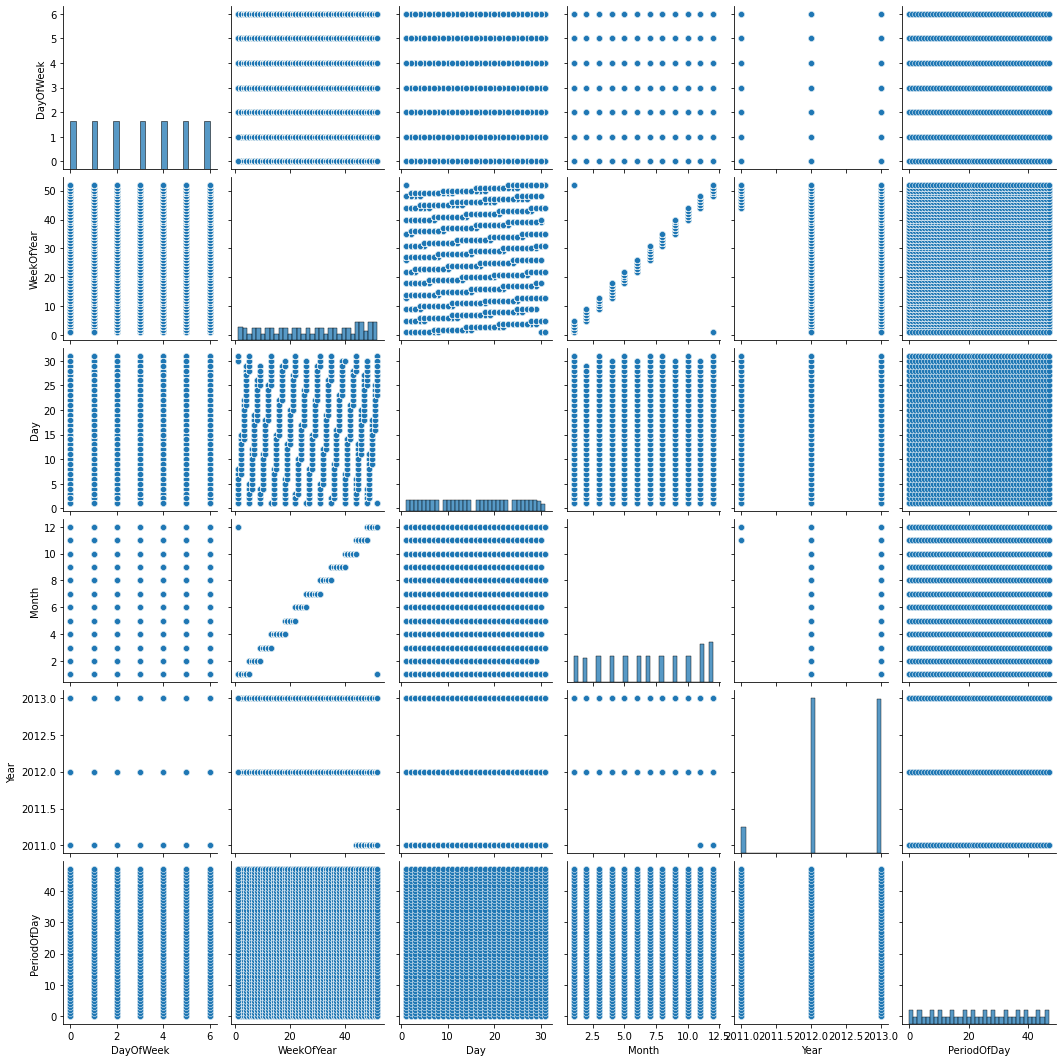

In [6]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

If you need to do further analysis about the data, please follow the Auto EDA library (Pandas Profiling)

In [7]:
pip install pandas-profiling

     |████████████████████████████████| 261 kB 10.3 MB/s            
     |████████████████████████████████| 102 kB 5.3 MB/s            
     |████████████████████████████████| 11.0 MB 16.2 MB/s            
     |████████████████████████████████| 675 kB 40.6 MB/s            
     |████████████████████████████████| 3.1 MB 40.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 303 kB 63.2 MB/s            
     |████████████████████████████████| 812 kB 67.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=63519ba7610fe539858df07c063a56ba3b8dcbd2a500d58840860c47fcbfe5fa
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c3/fe/0b/4450b38bceb9ae43dd7d0f16e353566f30f5f4d59a58eca2ed
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=788961e1f94b83449534bc076d433270ba471b78b88afed50dce9f30e9900ecb
  Sto

In [8]:
#importing required packages
import pandas as pd
import pandas_profiling
import numpy as np

#descriptive statistics
profile = pandas_profiling.ProfileReport(df)

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_file("EDA_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.describe()

DayOfWeek    WeekOfYear           Day         Month          Year  \
count  38014.000000  38014.000000  38014.000000  38014.000000  38014.000000   
mean       2.997317     28.124586     15.739412      6.904246   2012.383859   
std        1.999959     15.587575      8.804247      3.573696      0.624956   
min        0.000000      1.000000      1.000000      1.000000   2011.000000   
25%        1.000000     15.000000      8.000000      4.000000   2012.000000   
50%        3.000000     29.000000     16.000000      7.000000   2012.000000   
75%        5.000000     43.000000     23.000000     10.000000   2013.000000   
max        6.000000     52.000000     31.000000     12.000000   2013.000000   

        PeriodOfDay  
count  38014.000000  
mean      23.501105  
std       13.853108  
min        0.000000  
25%       12.000000  
50%       24.000000  
75%       35.750000  
max       47.000000

## 4. Data Preprocessing

### 4.1 Change the format of the variables

We can see Unnamed: 0 column is useless because it doesn't give any meaningful thing and it's just an index column. Therefore we can remove that column from the dataset.

In [12]:
var = ['ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
           'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
           'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']
for i in var:
    df[i] = pd.to_numeric(df[i], errors= 'coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   DayOfWeek               38014 non-null  int64  
 3   WeekOfYear              38014 non-null  int64  
 4   Day                     38014 non-null  int64  
 5   Month                   38014 non-null  int64  
 6   Year                    38014 non-null  int64  
 7   PeriodOfDay             38014 non-null  int64  
 8   ForecastWindProduction  38009 non-null  float64
 9   SystemLoadEA            38012 non-null  float64
 10  SMPEA                   38012 non-null  float64
 11  ORKTemperature          37719 non-null  float64
 12  ORKWindspeed            37715 non-null  float64
 13  CO2Intensity            38007 non-null  float64
 14  ActualWindProduction    38009 non-null

### 4.2 Dealing with missing values

To check the number of missing values in the dataset,

In [14]:
df.isnull().sum()

DateTime                    0
Holiday                     0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

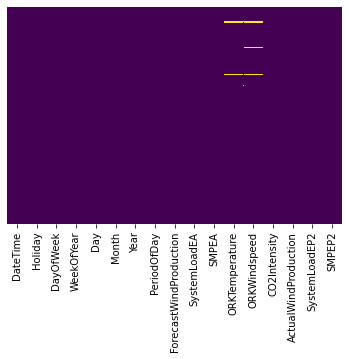

In [15]:
# To visulize it
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

We can see <b> Ratings, RAM, ROM, Mobile_Size, Selfi_Cam </b> variables have missing values and we need to treat them first.

In here we will apply bellow techniques to deal with missing values and among them we will find what is the most appropriate missing value technique for each variable.

* Mean/Medain/Mode Imputation
* Random number Imputation

#### 4.2.1 Mean/Medain/Mode Imputation

When the data follow <b>normal distribution</b>, <b>mean value replacement</b> is the best method. But when the data <b>skewed</b> it's better to do the <b>meadian</b> value replacement.

In [16]:
missing_var = ['ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 
               'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
              'ActualWindProduction', 'SystemLoadEP2']

Put all the missing value variables into an another dataframe and name it as df_missing. 

In [17]:
df_missing= df[missing_var]
df_missing.head()

ForecastWindProduction  SystemLoadEA  SMPEA  ORKTemperature  ORKWindspeed  \
0                  315.31       3388.77  49.26             6.0           9.3   
1                  321.80       3196.66  49.26             6.0          11.1   
2                  328.57       3060.71  49.10             5.0          11.1   
3                  335.60       2945.56  48.04             6.0           9.3   
4                  342.90       2849.34  33.75             6.0          11.1   

   CO2Intensity  ActualWindProduction  SystemLoadEP2  
0        600.71                 356.0        3159.60  
1        605.42                 317.0        2973.01  
2        589.97                 311.0        2834.00  
3        585.94                 313.0        2725.99  
4        571.52                 346.0        2655.64

To look at the distributions of the variables which has the missing values.

<Figure size 360x360 with 0 Axes>

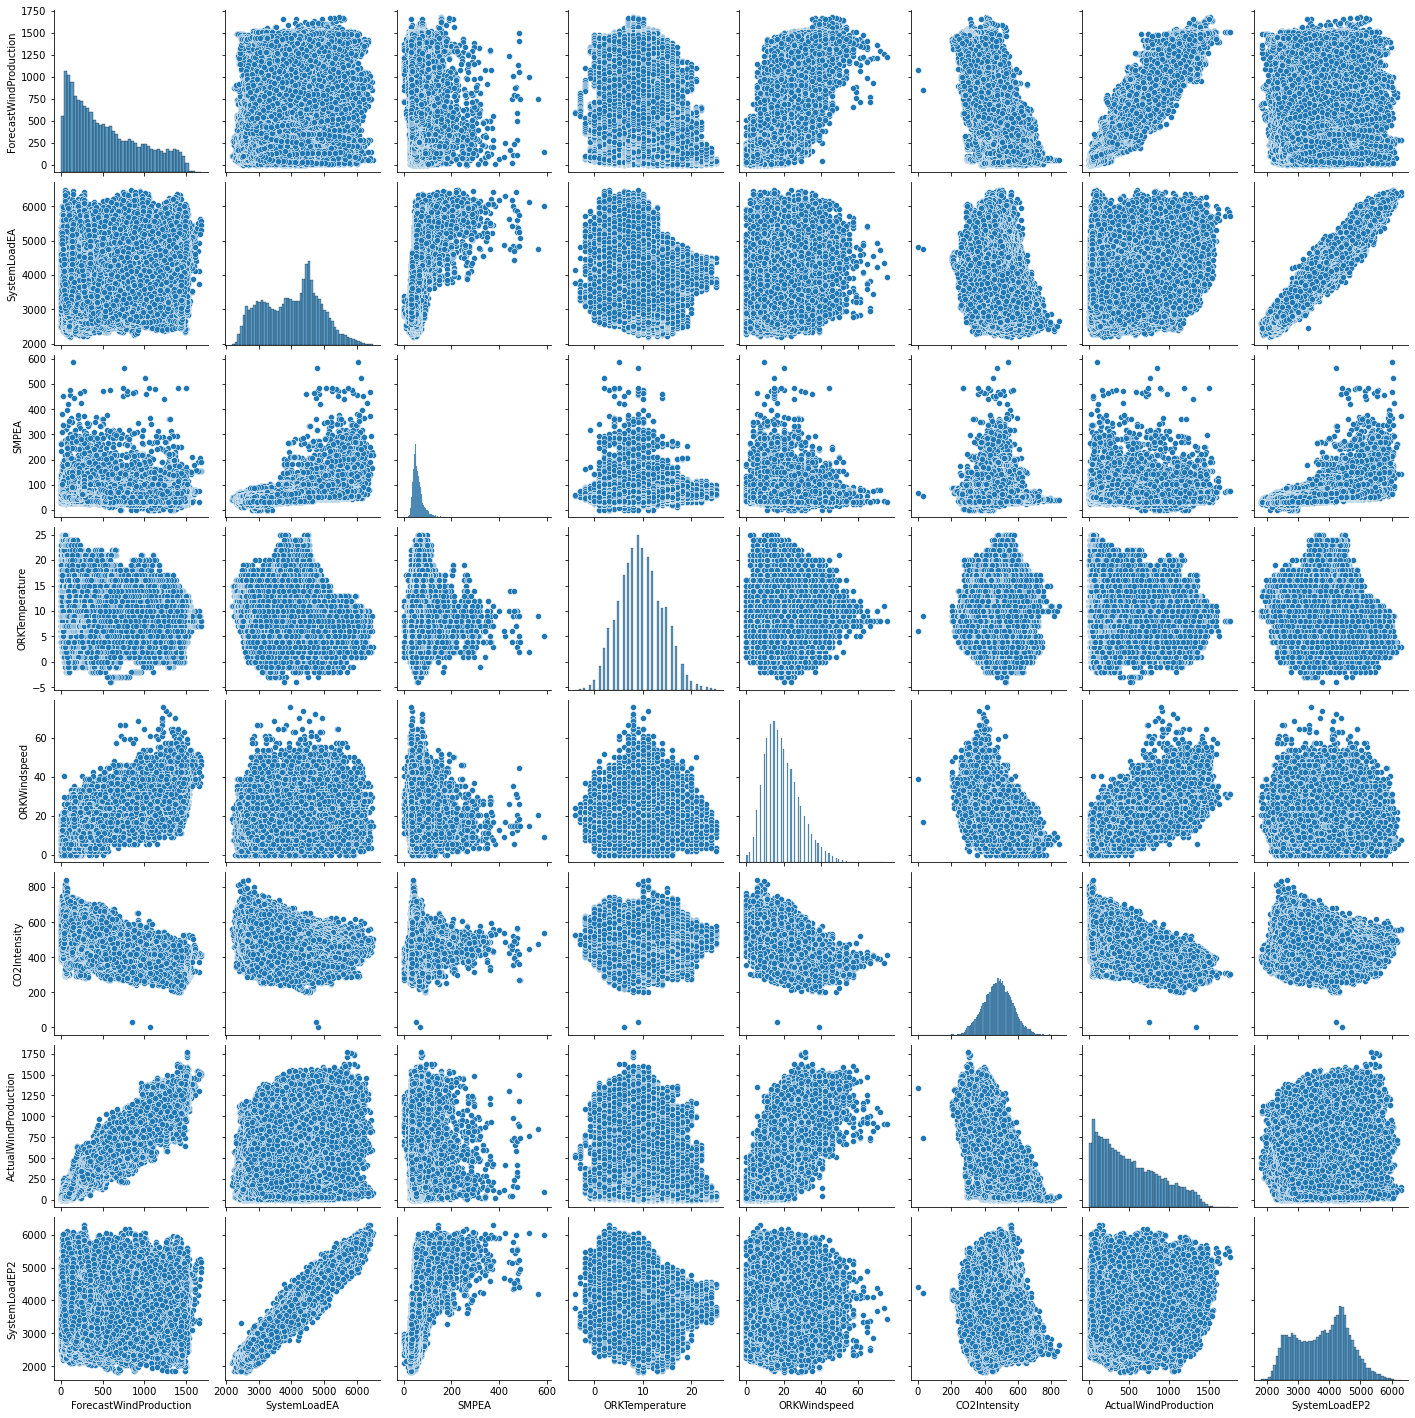

In [18]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df_missing)

By looking at the above graph's diagonal(histograms), it shows all the varbales are skewed. Therefore we will use median imputation technique.

In [19]:
# If the variable has a missing value, this function will repalce that missing value by it's median 
def impute_nan(df,variable):
    df[variable+"_median"]=df[variable].fillna(df[variable].median())

In [20]:
# run above function for all the missing value variable
for i in missing_var:
    impute_nan(df_missing,i)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [21]:
df_missing.head()

ForecastWindProduction  SystemLoadEA  SMPEA  ORKTemperature  ORKWindspeed  \
0                  315.31       3388.77  49.26             6.0           9.3   
1                  321.80       3196.66  49.26             6.0          11.1   
2                  328.57       3060.71  49.10             5.0          11.1   
3                  335.60       2945.56  48.04             6.0           9.3   
4                  342.90       2849.34  33.75             6.0          11.1   

   CO2Intensity  ActualWindProduction  SystemLoadEP2  \
0        600.71                 356.0        3159.60   
1        605.42                 317.0        2973.01   
2        589.97                 311.0        2834.00   
3        585.94                 313.0        2725.99   
4        571.52                 346.0        2655.64   

   ForecastWindProduction_median  SystemLoadEA_median  SMPEA_median  \
0                         315.31              3388.77         49.26   
1                         321.80              3196.66         49.26   
2                         328.57              3060.71         49.10   
3                         335.60              2945.56         48.04   
4                         342.90              2849.34         33.75   

   ORKTemperature_median  ORKWindspeed_median  CO2Intensity_median  \
0                    6.0                  9.3               600.71   
1                    6.0                 11.1               605.42   
2                    5.0                 11.1               589.97   
3                    6.0                  9.3               585.94   
4                    6.0                 11.1               571.52   

   ActualWindProduction_median  SystemLoadEP2_median  
0                        356.0               3159.60  
1                        317.0               2973.01  
2                        311.0               2834.00  
3                        313.0               2725.99  
4                        346.0               2655.64

In [22]:
df_missing.isnull().sum()

ForecastWindProduction             5
SystemLoadEA                       2
SMPEA                              2
ORKTemperature                   295
ORKWindspeed                     299
CO2Intensity                       7
ActualWindProduction               5
SystemLoadEP2                      2
ForecastWindProduction_median      0
SystemLoadEA_median                0
SMPEA_median                       0
ORKTemperature_median              0
ORKWindspeed_median                0
CO2Intensity_median                0
ActualWindProduction_median        0
SystemLoadEP2_median               0
dtype: int64

#### 4.2.2 Random number Imputation

In [23]:
# If the variable has a missing value, this function will repalce that missing value by a random number (this random number will choose from the relavant variable) 
def impute_nan_random(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [24]:
for i in missing_var:
    impute_nan_random(df_missing,i)

In [25]:
df_missing.head()

ForecastWindProduction  SystemLoadEA  SMPEA  ORKTemperature  ORKWindspeed  \
0                  315.31       3388.77  49.26             6.0           9.3   
1                  321.80       3196.66  49.26             6.0          11.1   
2                  328.57       3060.71  49.10             5.0          11.1   
3                  335.60       2945.56  48.04             6.0           9.3   
4                  342.90       2849.34  33.75             6.0          11.1   

   CO2Intensity  ActualWindProduction  SystemLoadEP2  \
0        600.71                 356.0        3159.60   
1        605.42                 317.0        2973.01   
2        589.97                 311.0        2834.00   
3        585.94                 313.0        2725.99   
4        571.52                 346.0        2655.64   

   ForecastWindProduction_median  SystemLoadEA_median  ...  \
0                         315.31              3388.77  ...   
1                         321.80              3196.66  ...   
2                         328.57              3060.71  ...   
3                         335.60              2945.56  ...   
4                         342.90              2849.34  ...   

   ActualWindProduction_median  SystemLoadEP2_median  \
0                        356.0               3159.60   
1                        317.0               2973.01   
2                        311.0               2834.00   
3                        313.0               2725.99   
4                        346.0               2655.64   

   ForecastWindProduction_random  SystemLoadEA_random  SMPEA_random  \
0                         315.31              3388.77         49.26   
1                         321.80              3196.66         49.26   
2                         328.57              3060.71         49.10   
3                         335.60              2945.56         48.04   
4                         342.90              2849.34         33.75   

   ORKTemperature_random  ORKWindspeed_random  CO2Intensity_random  \
0                    6.0                  9.3               600.71   
1                    6.0                 11.1               605.42   
2                    5.0                 11.1               589.97   
3                    6.0                  9.3               585.94   
4                    6.0                 11.1               571.52   

   ActualWindProduction_random  SystemLoadEP2_random  
0                        356.0               3159.60  
1                        317.0               2973.01  
2                        311.0               2834.00  
3                        313.0               2725.99  
4                        346.0               2655.64  

[5 rows x 24 columns]

In [26]:
df_missing.isnull().sum()

ForecastWindProduction             5
SystemLoadEA                       2
SMPEA                              2
ORKTemperature                   295
ORKWindspeed                     299
CO2Intensity                       7
ActualWindProduction               5
SystemLoadEP2                      2
ForecastWindProduction_median      0
SystemLoadEA_median                0
SMPEA_median                       0
ORKTemperature_median              0
ORKWindspeed_median                0
CO2Intensity_median                0
ActualWindProduction_median        0
SystemLoadEP2_median               0
ForecastWindProduction_random      0
SystemLoadEA_random                0
SMPEA_random                       0
ORKTemperature_random              0
ORKWindspeed_random                0
CO2Intensity_random                0
ActualWindProduction_random        0
SystemLoadEP2_random               0
dtype: int64

In [27]:
#Comparison of the distrbutions before and after deali with missing values
def comparison_plot(df, variable):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[variable].plot(kind='kde', ax=ax)
    df[variable+"_median"].plot(kind='kde', ax=ax, color='red')
    df[variable+"_random"].plot(kind='kde', ax=ax, color='green')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

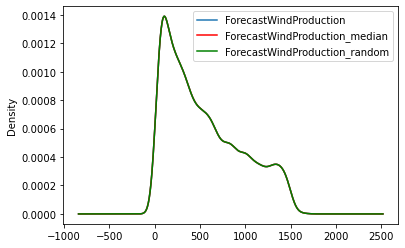

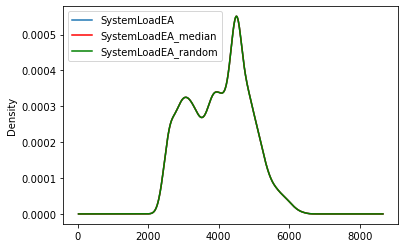

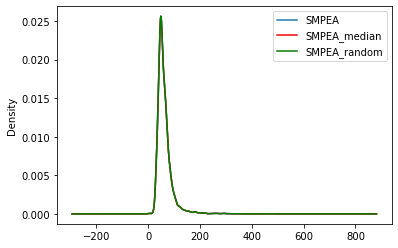

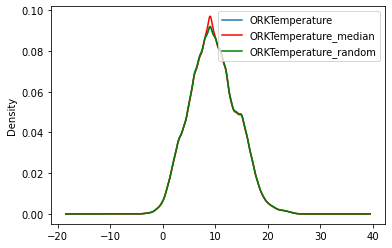

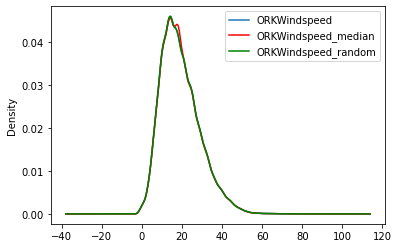

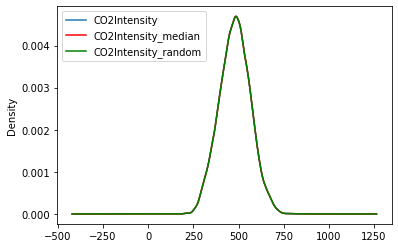

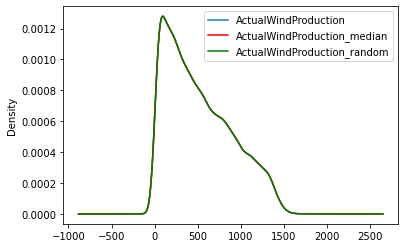

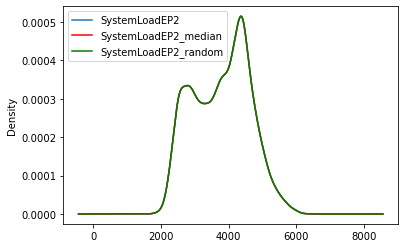

In [28]:
for i in missing_var:
    comparison_plot(df_missing,i)

In [29]:
#Compare the standard values before and after imputation
def compare_std(df, variable):
    print("original std of ", variable, "is ", df[variable].std(), 
          "and after median repalcement std: ", df[variable+"_median"].std(),
          "and after random number repalcement std: ", df[variable+"_random"].std())

In [30]:
for i in missing_var:
    compare_std(df_missing,i)

original std of  ForecastWindProduction is  414.36462893224797 and after median repalcement std:  414.33903683935665 and after random number repalcement std:  414.3543675387491
original std of  SystemLoadEA is  860.4768656757118 and after median repalcement std:  860.4544422227823 and after random number repalcement std:  860.4819199375786
original std of  SMPEA is  32.25233436846567 and after median repalcement std:  32.25153166377813 and after random number repalcement std:  32.25149018350783
original std of  ORKTemperature is  4.439933864206292 and after median repalcement std:  4.423013784106497 and after random number repalcement std:  4.439844670951006
original std of  ORKWindspeed is  9.571311002616099 and after median repalcement std:  9.533801360365423 and after random number repalcement std:  9.568402631417662
original std of  CO2Intensity is  85.35470631468225 and after median repalcement std:  85.34684797065617 and after random number repalcement std:  85.37035754081083
ori

By looking at the kernel density plots and the standard values, we can obtained random number imputation method is the best method as it doesn't distrote the original distribution's behaviors.

In [31]:
#Combine df_missing and df dataframes
df_missing.head()

ForecastWindProduction  SystemLoadEA  SMPEA  ORKTemperature  ORKWindspeed  \
0                  315.31       3388.77  49.26             6.0           9.3   
1                  321.80       3196.66  49.26             6.0          11.1   
2                  328.57       3060.71  49.10             5.0          11.1   
3                  335.60       2945.56  48.04             6.0           9.3   
4                  342.90       2849.34  33.75             6.0          11.1   

   CO2Intensity  ActualWindProduction  SystemLoadEP2  \
0        600.71                 356.0        3159.60   
1        605.42                 317.0        2973.01   
2        589.97                 311.0        2834.00   
3        585.94                 313.0        2725.99   
4        571.52                 346.0        2655.64   

   ForecastWindProduction_median  SystemLoadEA_median  ...  \
0                         315.31              3388.77  ...   
1                         321.80              3196.66  ...   
2                         328.57              3060.71  ...   
3                         335.60              2945.56  ...   
4                         342.90              2849.34  ...   

   ActualWindProduction_median  SystemLoadEP2_median  \
0                        356.0               3159.60   
1                        317.0               2973.01   
2                        311.0               2834.00   
3                        313.0               2725.99   
4                        346.0               2655.64   

   ForecastWindProduction_random  SystemLoadEA_random  SMPEA_random  \
0                         315.31              3388.77         49.26   
1                         321.80              3196.66         49.26   
2                         328.57              3060.71         49.10   
3                         335.60              2945.56         48.04   
4                         342.90              2849.34         33.75   

   ORKTemperature_random  ORKWindspeed_random  CO2Intensity_random  \
0                    6.0                  9.3               600.71   
1                    6.0                 11.1               605.42   
2                    5.0                 11.1               589.97   
3                    6.0                  9.3               585.94   
4                    6.0                 11.1               571.52   

   ActualWindProduction_random  SystemLoadEP2_random  
0                        356.0               3159.60  
1                        317.0               2973.01  
2                        311.0               2834.00  
3                        313.0               2725.99  
4                        346.0               2655.64  

[5 rows x 24 columns]

In [32]:
df_missing.columns

Index(['ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 'ORKTemperature',
       'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2',
       'ForecastWindProduction_median', 'SystemLoadEA_median', 'SMPEA_median',
       'ORKTemperature_median', 'ORKWindspeed_median', 'CO2Intensity_median',
       'ActualWindProduction_median', 'SystemLoadEP2_median',
       'ForecastWindProduction_random', 'SystemLoadEA_random', 'SMPEA_random',
       'ORKTemperature_random', 'ORKWindspeed_random', 'CO2Intensity_random',
       'ActualWindProduction_random', 'SystemLoadEP2_random'],
      dtype='object')

In [33]:
df_new = pd.concat([df, df_missing[['ForecastWindProduction_random', 'SystemLoadEA_random', 'SMPEA_random',
       'ORKTemperature_random', 'ORKWindspeed_random', 'CO2Intensity_random',
       'ActualWindProduction_random', 'SystemLoadEP2_random']]], axis = 1)

In [34]:
df_new.head()

DateTime Holiday  DayOfWeek  WeekOfYear  Day  Month  Year  \
0  01/11/2011 00:00    None          1          44    1     11  2011   
1  01/11/2011 00:30    None          1          44    1     11  2011   
2  01/11/2011 01:00    None          1          44    1     11  2011   
3  01/11/2011 01:30    None          1          44    1     11  2011   
4  01/11/2011 02:00    None          1          44    1     11  2011   

   PeriodOfDay  ForecastWindProduction  SystemLoadEA  ...  SystemLoadEP2  \
0            0                  315.31       3388.77  ...        3159.60   
1            1                  321.80       3196.66  ...        2973.01   
2            2                  328.57       3060.71  ...        2834.00   
3            3                  335.60       2945.56  ...        2725.99   
4            4                  342.90       2849.34  ...        2655.64   

   SMPEP2  ForecastWindProduction_random  SystemLoadEA_random  SMPEA_random  \
0   54.32                         315.31              3388.77         49.26   
1   54.23                         321.80              3196.66         49.26   
2   54.23                         328.57              3060.71         49.10   
3   53.47                         335.60              2945.56         48.04   
4   39.87                         342.90              2849.34         33.75   

   ORKTemperature_random  ORKWindspeed_random  CO2Intensity_random  \
0                    6.0                  9.3               600.71   
1                    6.0                 11.1               605.42   
2                    5.0                 11.1               589.97   
3                    6.0                  9.3               585.94   
4                    6.0                 11.1               571.52   

   ActualWindProduction_random  SystemLoadEP2_random  
0                        356.0               3159.60  
1                        317.0               2973.01  
2                        311.0               2834.00  
3                        313.0               2725.99  
4                        346.0               2655.64  

[5 rows x 25 columns]

In [35]:
#remove the unnecessary columns
df_new.drop(missing_var, axis = 1, inplace = True)

In [36]:
df_new.head()

DateTime Holiday  DayOfWeek  WeekOfYear  Day  Month  Year  \
0  01/11/2011 00:00    None          1          44    1     11  2011   
1  01/11/2011 00:30    None          1          44    1     11  2011   
2  01/11/2011 01:00    None          1          44    1     11  2011   
3  01/11/2011 01:30    None          1          44    1     11  2011   
4  01/11/2011 02:00    None          1          44    1     11  2011   

   PeriodOfDay  SMPEP2  ForecastWindProduction_random  SystemLoadEA_random  \
0            0   54.32                         315.31              3388.77   
1            1   54.23                         321.80              3196.66   
2            2   54.23                         328.57              3060.71   
3            3   53.47                         335.60              2945.56   
4            4   39.87                         342.90              2849.34   

   SMPEA_random  ORKTemperature_random  ORKWindspeed_random  \
0         49.26                    6.0                  9.3   
1         49.26                    6.0                 11.1   
2         49.10                    5.0                 11.1   
3         48.04                    6.0                  9.3   
4         33.75                    6.0                 11.1   

   CO2Intensity_random  ActualWindProduction_random  SystemLoadEP2_random  
0               600.71                        356.0               3159.60  
1               605.42                        317.0               2973.01  
2               589.97                        311.0               2834.00  
3               585.94                        313.0               2725.99  
4               571.52                        346.0               2655.64

In [37]:
df_new.isnull().sum()

DateTime                         0
Holiday                          0
DayOfWeek                        0
WeekOfYear                       0
Day                              0
Month                            0
Year                             0
PeriodOfDay                      0
SMPEP2                           2
ForecastWindProduction_random    0
SystemLoadEA_random              0
SMPEA_random                     0
ORKTemperature_random            0
ORKWindspeed_random              0
CO2Intensity_random              0
ActualWindProduction_random      0
SystemLoadEP2_random             0
dtype: int64

droping the missing values in the independent variable <b> SMPEP2 </b>

In [38]:
df_new= df_new.dropna()

In [39]:
df_new.isnull().sum()

DateTime                         0
Holiday                          0
DayOfWeek                        0
WeekOfYear                       0
Day                              0
Month                            0
Year                             0
PeriodOfDay                      0
SMPEP2                           0
ForecastWindProduction_random    0
SystemLoadEA_random              0
SMPEA_random                     0
ORKTemperature_random            0
ORKWindspeed_random              0
CO2Intensity_random              0
ActualWindProduction_random      0
SystemLoadEP2_random             0
dtype: int64

Now we have a clean dataset

## 4.3 Modify Variables(Feature Engineering)

In [40]:
df_new['Holiday'].value_counts()

None                    36478
Christmas                 144
Christmas Eve             144
St Stephen's Day          144
New Year's Eve            144
Easter Monday              96
Good Friday                96
May Day                    96
St Patrick's Day           96
October Bank Holiday       96
August Bank Holiday        96
New Year's Day             96
June Bank Holiday          96
Holy Saturday              96
Easter                     94
Name: Holiday, dtype: int64

In [41]:
df['Holiday'].dtype

dtype('O')

In [42]:
import seaborn as sns

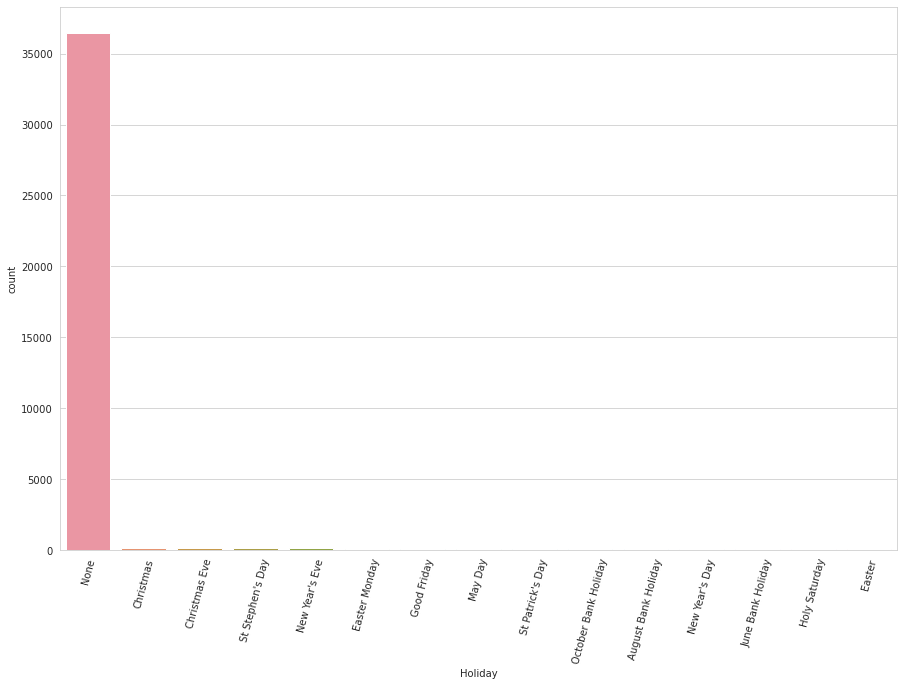

In [43]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Holiday',
              data=df_new,
             order = df_new['Holiday'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

We can see majority of the Holiday types are <b>None</b>. Therefore we should remove this variable first.

In [44]:
df_holiday = df_new.loc[df_new['Holiday']!='None', :]

In [45]:
df_holiday.head()

DateTime        Holiday  DayOfWeek  WeekOfYear  Day  Month  \
2544  24/12/2011 00:00  Christmas Eve          5          51   24     12   
2545  24/12/2011 00:30  Christmas Eve          5          51   24     12   
2546  24/12/2011 01:00  Christmas Eve          5          51   24     12   
2547  24/12/2011 01:30  Christmas Eve          5          51   24     12   
2548  24/12/2011 02:00  Christmas Eve          5          51   24     12   

      Year  PeriodOfDay  SMPEP2  ForecastWindProduction_random  \
2544  2011            0   44.96                          718.7   
2545  2011            1   44.96                          741.1   
2546  2011            2   44.54                          768.0   
2547  2011            3   43.48                          806.9   
2548  2011            4   41.72                          845.9   

      SystemLoadEA_random  SMPEA_random  ORKTemperature_random  \
2544              4153.59         44.96                    2.0   
2545              3896.85         44.54                    3.0   
2546              3679.45         42.73                    3.0   
2547              3510.25         41.72                    4.0   
2548              3363.41         41.56                    3.0   

      ORKWindspeed_random  CO2Intensity_random  ActualWindProduction_random  \
2544                 11.1               477.20                        666.0   
2545                 18.5               467.15                        641.0   
2546                 16.7               469.53                        644.0   
2547                 14.8               467.95                        645.0   
2548                 11.1               470.66                        693.0   

      SystemLoadEP2_random  
2544               3634.24  
2545               3382.16  
2546               3204.06  
2547               2997.83  
2548               2831.80

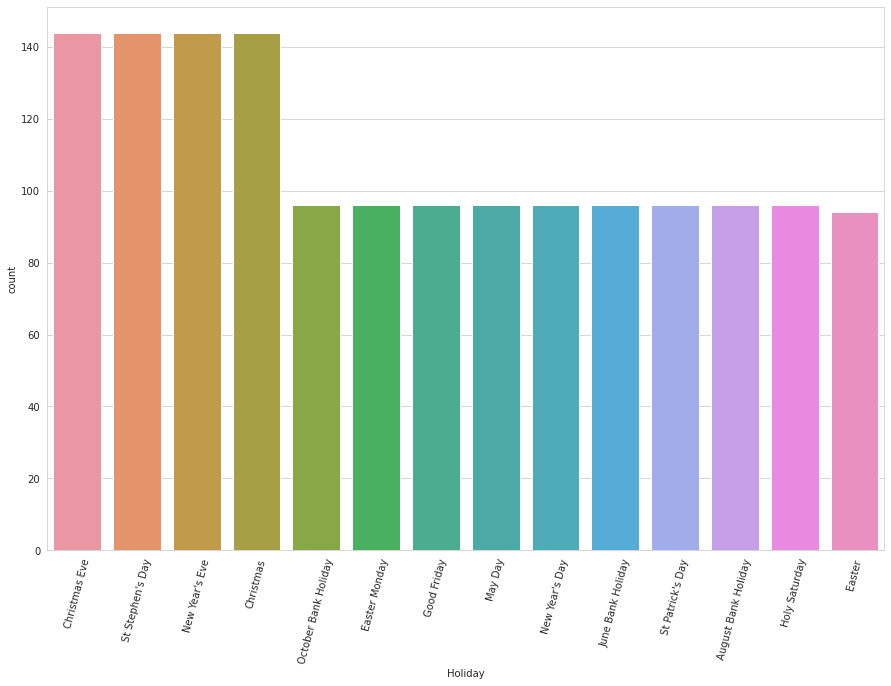

In [46]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Holiday',
              data=df_holiday,
             order = df_holiday['Holiday'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

Initially we rename these holiday type as holiday or not. Then ML model can easily to identify the holiday type.

In [47]:
df_new['Holiday'] = np.where(df_new['Holiday']!='None', 1, 0)

In [48]:
df_new['Holiday'].value_counts()

0    36478
1     1534
Name: Holiday, dtype: int64

In [49]:
df_new.head()

DateTime  Holiday  DayOfWeek  WeekOfYear  Day  Month  Year  \
0  01/11/2011 00:00        0          1          44    1     11  2011   
1  01/11/2011 00:30        0          1          44    1     11  2011   
2  01/11/2011 01:00        0          1          44    1     11  2011   
3  01/11/2011 01:30        0          1          44    1     11  2011   
4  01/11/2011 02:00        0          1          44    1     11  2011   

   PeriodOfDay  SMPEP2  ForecastWindProduction_random  SystemLoadEA_random  \
0            0   54.32                         315.31              3388.77   
1            1   54.23                         321.80              3196.66   
2            2   54.23                         328.57              3060.71   
3            3   53.47                         335.60              2945.56   
4            4   39.87                         342.90              2849.34   

   SMPEA_random  ORKTemperature_random  ORKWindspeed_random  \
0         49.26                    6.0                  9.3   
1         49.26                    6.0                 11.1   
2         49.10                    5.0                 11.1   
3         48.04                    6.0                  9.3   
4         33.75                    6.0                 11.1   

   CO2Intensity_random  ActualWindProduction_random  SystemLoadEP2_random  
0               600.71                        356.0               3159.60  
1               605.42                        317.0               2973.01  
2               589.97                        311.0               2834.00  
3               585.94                        313.0               2725.99  
4               571.52                        346.0               2655.64

### 4.4 Drop unnecessary columns

Remove the DateTime from the dataset.

In [50]:
df_new.drop("DateTime", inplace = True, axis = 1)

In [51]:
df_new.head()

Holiday  DayOfWeek  WeekOfYear  Day  Month  Year  PeriodOfDay  SMPEP2  \
0        0          1          44    1     11  2011            0   54.32   
1        0          1          44    1     11  2011            1   54.23   
2        0          1          44    1     11  2011            2   54.23   
3        0          1          44    1     11  2011            3   53.47   
4        0          1          44    1     11  2011            4   39.87   

   ForecastWindProduction_random  SystemLoadEA_random  SMPEA_random  \
0                         315.31              3388.77         49.26   
1                         321.80              3196.66         49.26   
2                         328.57              3060.71         49.10   
3                         335.60              2945.56         48.04   
4                         342.90              2849.34         33.75   

   ORKTemperature_random  ORKWindspeed_random  CO2Intensity_random  \
0                    6.0                  9.3               600.71   
1                    6.0                 11.1               605.42   
2                    5.0                 11.1               589.97   
3                    6.0                  9.3               585.94   
4                    6.0                 11.1               571.52   

   ActualWindProduction_random  SystemLoadEP2_random  
0                        356.0               3159.60  
1                        317.0               2973.01  
2                        311.0               2834.00  
3                        313.0               2725.99  
4                        346.0               2655.64

We an see there's a relationship between price and the brand. Therefore we will use nominal encoding method to encode the Brand me variable.

In [52]:
df_new.shape

(38012, 16)

### 4.5 Feature Selection

Understanding the correlation of features between target and other features.

In [53]:
corr = df_new.corr()
corr.shape

(16, 16)

<AxesSubplot:>

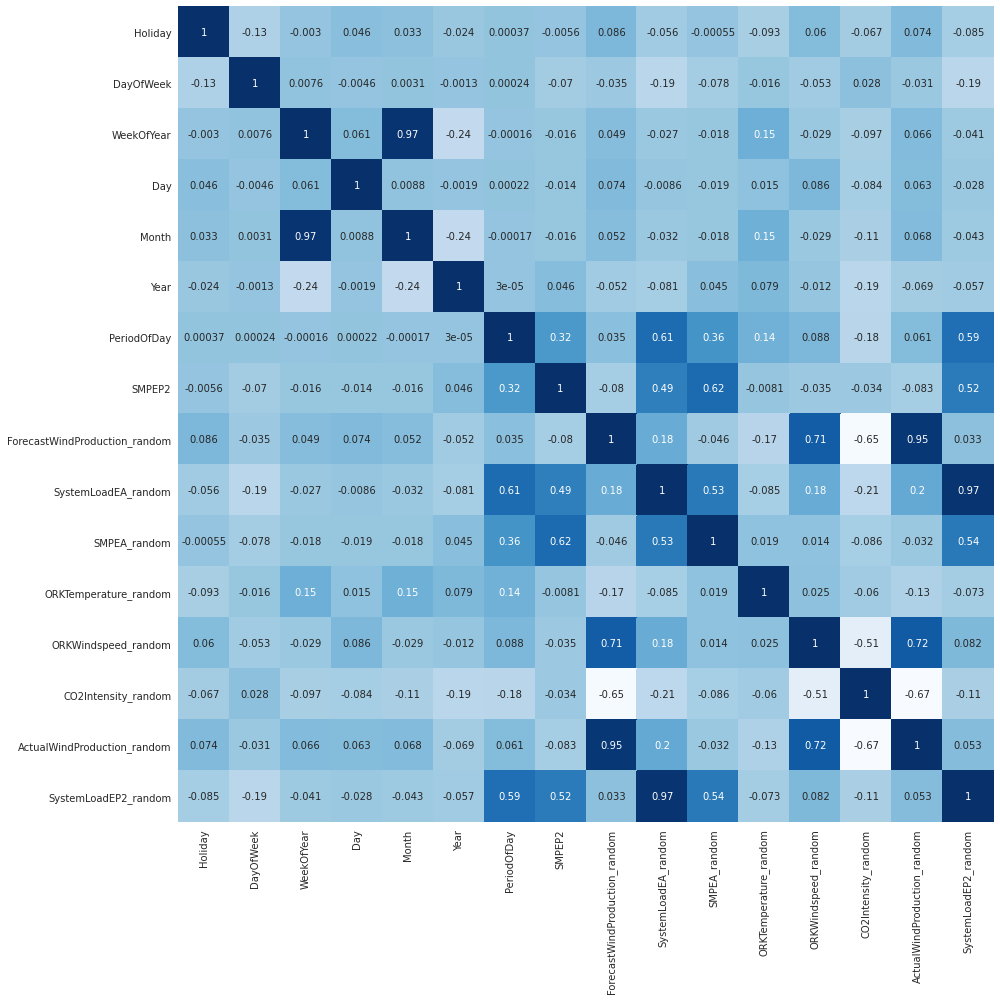

In [148]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=False, square= True, annot=True, cmap='Blues')

By looking at the above heatmap there's a multicollinearity in the dataset. You can confirm it by using the bellow function.

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features = correlation(df_new, 0.7)
len(set(corr_features))

4

In [56]:
corr_features

{'ActualWindProduction_random',
 'Month',
 'ORKWindspeed_random',
 'SystemLoadEP2_random'}

This function also implies, there's a inter correlation between independent variables.

In [57]:
corr_variables = ['WeekOfYear', 'Month', 'ActualWindProduction_random',  'ForecastWindProduction_random',  'SystemLoadEA_random', 'SystemLoadEP2_random', 'SMPEP2']

<AxesSubplot:>

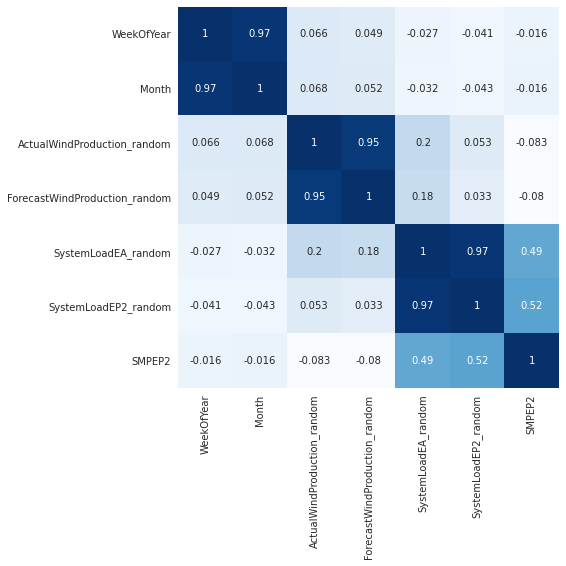

In [58]:
mul_corr = df_new[corr_variables].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(7,7))
sns.heatmap(mul_corr, cbar=False, square= True, annot=True, cmap='Blues')

We are only taking the varibales, who have height correlation value with the dependent variable. According to that will choose, 
* Month
* ActualWindProduction_random
* SystemLoadEA_random

among the highly correlated features

In [59]:
df_new.drop(['Month', 'ActualWindProduction_random',   'SystemLoadEA_random'], axis = 1, inplace = True)

In [60]:
df_new.shape

(38012, 13)

### 4.6 Feature Importance

In [61]:
df_new.head()

Holiday  DayOfWeek  WeekOfYear  Day  Year  PeriodOfDay  SMPEP2  \
0        0          1          44    1  2011            0   54.32   
1        0          1          44    1  2011            1   54.23   
2        0          1          44    1  2011            2   54.23   
3        0          1          44    1  2011            3   53.47   
4        0          1          44    1  2011            4   39.87   

   ForecastWindProduction_random  SMPEA_random  ORKTemperature_random  \
0                         315.31         49.26                    6.0   
1                         321.80         49.26                    6.0   
2                         328.57         49.10                    5.0   
3                         335.60         48.04                    6.0   
4                         342.90         33.75                    6.0   

   ORKWindspeed_random  CO2Intensity_random  SystemLoadEP2_random  
0                  9.3               600.71               3159.60  
1                 11.1               605.42               2973.01  
2                 11.1               589.97               2834.00  
3                  9.3               585.94               2725.99  
4                 11.1               571.52               2655.64

In [62]:
df_new.columns

Index(['Holiday', 'DayOfWeek', 'WeekOfYear', 'Day', 'Year', 'PeriodOfDay',
       'SMPEP2', 'ForecastWindProduction_random', 'SMPEA_random',
       'ORKTemperature_random', 'ORKWindspeed_random', 'CO2Intensity_random',
       'SystemLoadEP2_random'],
      dtype='object')

In [63]:
X = df_new[['Holiday', 'DayOfWeek', 'WeekOfYear', 'Day', 'Year', 'PeriodOfDay',
       'ForecastWindProduction_random', 'SMPEA_random',
       'ORKTemperature_random', 'ORKWindspeed_random', 'CO2Intensity_random',
       'SystemLoadEP2_random']]
y = df_new['SMPEP2']

Feature: 0, Score: 4.96979
Feature: 1, Score: 0.37501
Feature: 2, Score: 0.03577
Feature: 3, Score: 0.02912
Feature: 4, Score: 2.43846
Feature: 5, Score: -0.01868
Feature: 6, Score: -0.00411
Feature: 7, Score: 0.51096
Feature: 8, Score: -0.04780
Feature: 9, Score: -0.11717
Feature: 10, Score: -0.00069
Feature: 11, Score: 0.01198


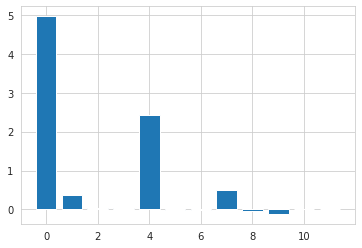

In [171]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 4.8 Transform the data

We can clearly see the scales of the variables are very different. Therefore we need to apply a transformation technique at the end.

In [64]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X=scaler.fit_transform(X)

In [65]:
X

array([[-0.20506766, -0.99864609,  1.01842669, ..., -1.03491895,
         1.42133272, -0.74280181],
       [-0.20506766, -0.99864609,  1.01842669, ..., -0.84679621,
         1.47651025, -0.96407445],
       [-0.20506766, -0.99864609,  1.01842669, ..., -0.84679621,
         1.2955139 , -1.1289231 ],
       ...,
       [ 4.87643938, -0.99864609, -1.74021269, ...,  0.12517128,
        -2.32511595, -0.38622071],
       [ 4.87643938, -0.99864609, -1.74021269, ..., -0.46009946,
        -2.07265826, -0.26324535],
       [ 4.87643938, -0.99864609, -1.74021269, ..., -0.26152546,
        -2.00764015, -0.3188748 ]])

## 5. Model Fitting

### 5.1 Split the dataset

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### 5.2 Linear Regression

In [175]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [176]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [177]:
# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

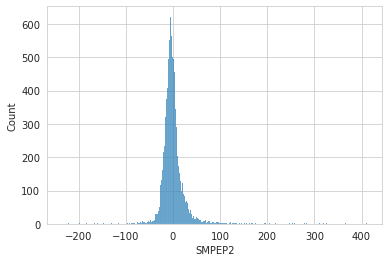

In [178]:
sns.histplot(y_test-y_pred_lr)
plt.show()

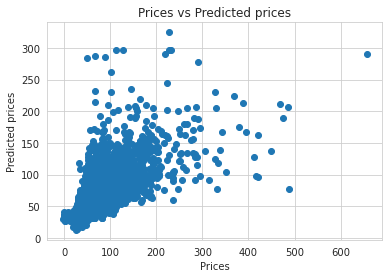

In [179]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [180]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_lr))

Coefficients: 
 [ 1.00601945  0.79612516  0.61981744  0.29471956  1.57376398 -0.23483614
 -1.55236354 16.58823767 -0.2532902  -1.12002474 -0.04881708 10.28107079]
Mean squared error: 578.03
Coefficient of determination: 0.47


In [181]:
# Training Score
print("Training Accuracy:",regr.score(X_train,y_train)*100)

# Testing Score
print("Testing Accuracy:",regr.score(X_test,y_test)*100)

Training Accuracy: 42.48807033144474
Testing Accuracy: 47.184514247543255


We can see accuracies are really poor. Therefore linear regression is not a good model.

### 5.3 Elastic Net Regression

In [182]:
from sklearn.linear_model import ElasticNet

In [183]:
EN_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [184]:
EN_model.fit(X_train,y_train)

ElasticNet()

In [185]:
# Training Score
print("Training Accuracy:",EN_model.score(X_train,y_train)*100)

Training Accuracy: 39.152960304895835


In [186]:
# Testing Score
print("Testing Accuracy:",EN_model.score(X_test,y_test)*100)

Testing Accuracy: 44.06877290957738


### 5.5 Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [191]:
y_pred = reg.predict(X_test)

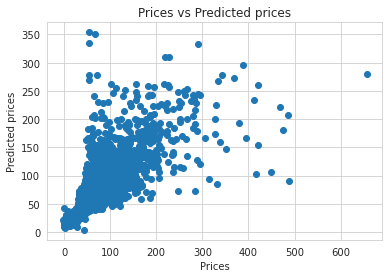

In [192]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [193]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 94.23337285583669


In [194]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 63.32529229869592


We can see there's an overfitting issue in this model as it has massive difference between training accuracy and testing accuracy.

In [77]:
import sklearn.metrics as metrics

In [197]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.757940801473167
MSE: 401.38322903305595
RMSE: 20.03455088174067


This is a good model(RELATIVELY). Therefore we will optimize this model to improve the performances.

### 5.6 Support Vector Regressor

In [198]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [199]:
y_pred = reg.predict(X_test)

In [200]:
# Training Score
print("Training Accuracy:",regressor.score(X_train,y_train)*100)

Training Accuracy: 35.96514635845875


In [201]:
# Testing Score
print("Testing Accuracy:",regressor.score(X_test,y_test)*100)

Testing Accuracy: 40.672275283112725


## 6. Hyper-Parameter Tuning

### 6.1 Randomized Search

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  31.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  30.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  31.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  49.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  49.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  49.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  37.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_esti

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
best_random_grid=rf_random.best_estimator_

In [ ]:
prediction = best_random_grid.predict(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


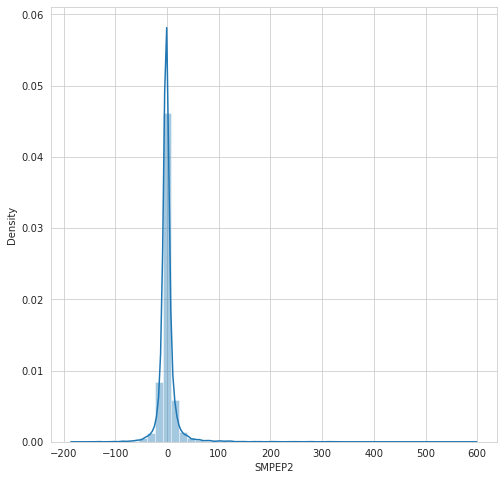

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

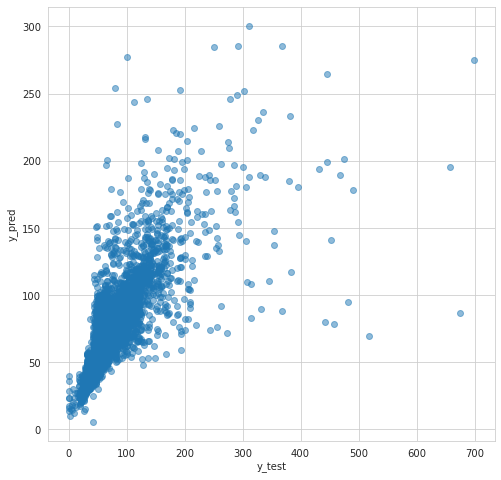

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 8.876550920022703
MSE: 474.11830014896793
RMSE: 21.774257740482636


In [79]:
# Training Score
print("Training Accuracy:",best_random_grid.score(X_train,y_train)*100)

# Testing Score
print("Testing Accuracy:",best_random_grid.score(X_test,y_test)*100)

Training Accuracy: 95.05514477780153
Testing Accuracy: 62.83485826107456


### 6.2 Grid Search

Seems to be there's is an overfitting again. Therefore we dont tune the max depth in here.

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [rf_random.best_params_['n_estimators']+50,
                    rf_random.best_params_['n_estimators']-50],
    'min_samples_split': [rf_random.best_params_['min_samples_split']+1,
                         rf_random.best_params_['min_samples_split']+2,
                         rf_random.best_params_['min_samples_split']+3],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf']],
    'max_features': [rf_random.best_params_['max_features']],
}

print(param_grid)


{'n_estimators': [1050, 950], 'min_samples_split': [3, 4, 5], 'min_samples_leaf': [1], 'max_features': ['sqrt']}


In [85]:
#### Fit the grid_search to the data
grid_search=GridSearchCV(estimator=reg,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [1050, 950]},
             verbose=2)

In [86]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=950)

In [87]:
best_grid=grid_search.best_estimator_

In [88]:
best_grid

RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=950)

In [89]:
# Training Score
print("Training Accuracy:",best_grid.score(X_train,y_train)*100)

# Testing Score
print("Testing Accuracy:",best_grid.score(X_test,y_test)*100)

Training Accuracy: 93.32070622424091
Testing Accuracy: 62.84188137648476


It reduce the both accuracies. Therefore we will go with the randomized search method's model as a best model.

## 7. Save the best model to reuse it again

In [90]:
import pickle
# open a file, where you ant to store the data
file = open('electricity_price_rg.pkl', 'wb')

# dump information to that file
pickle.dump(best_grid, file)

In [92]:
#Load the model
model = open('electricity_price_rg.pkl','rb')
reg_rand = pickle.load(model)

In [93]:
y_prediction = reg_rand.predict(X_test)

In [94]:
metrics.r2_score(y_test, y_prediction)

0.6284188137648475